<h2>LOGISTICKÁ REGRESIA</h2>

Zo stránky https://mvi.mechatronika.cool/sites/default/files/programy/Social_Network_Ads_SVVI.zip stiahneme súbor <strong>Social_Network_Ads_SVVI.zip</strong> a nájdeme v archíve súbor <strong>Social_Network_Ads.csv</strong>.

Z tohto archívu nás teda zaujíma súbor <strong>Social_Network_Ads.csv</strong>. Dáme ho do priečinka, kde sa nachádza aj tento notebook (ipynb súbor). Budú teda v tom istom priečinku. Nakoľko csv súbory Excel nie vždy otvára správne, otvoríme ho priamo v JupyterLab alebo Google Colab alebo online pomocou stránky https://limonte.github.io/csv-viewer-online/ .

V tejto tabuľke sa nachádzajú údaje o používateľoch sociálnej siete, ktorým bola zobrazená reklama produktu. Závislou premennou je fakt, či daný užívateľ produkt kúpil alebo nie. Ide teda o typický príklad problému klasifikácie do 2 tried. Jednoduchou metódou klasifikácie je logistická regresia.

Využijeme výňatok z kódu nášho <strong>data preprocessing templatu</strong>, pričom sme zmazali časti, ktoré vzhľadom k povahe datasetu (<em>Taking care of missing data</em>, <em>Encoding categorical data</em>, <em>Feature Scaling</em>). <em>Feature Scaling</em> síce potrebujeme, ale doplníme ho neskôr, nakoľko tam bude drobná zmena.<br>Riadok s načítaním <strong><em>X</em></strong> sme upravili, nakoľko za nezávislé premenné, ktoré chceme použiť, považujeme len vek a plat užívateľa (pohlavie a User ID nás nezaujíma - viď. naše CSV). Riadok s <strong><em>y</em></strong> sme upravili nasledovne, keďže závislé údaje sú v stĺpci s indexom 4.

In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

Riadok s rozdeľovaním dát na trénovacie a testovacie upravíme tak, aby testovacie dáta tvorili štvrtinu datasetu:

In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Sekciu s Feature Scaling upravíme podľa nášho datasetu, pričom scalovať ho môžeme celý:

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Potrebujeme teraz vytvoriť logistický klasifikátor – objekt triedy <strong>LogisticRegression</strong>. Spustíme teda kód:

In [4]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

Random_state nastavený na istú hodnotu nám zabezpečí, že výsledok bude vždy rovnaký, ak klasifikátor spustíme na 2 počítačoch, čo je vhodné na edukačné účely.

Teraz klasifikátor potrebujeme vypočítať podľa našich trénovacích dát. Spustíme kód:

In [5]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Otestujeme klasifikátor pre 30-ročného človeka, ktorý zarába 87000.

In [6]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


Teraz otestujeme náš klasifikátor na testovacích dátach. Zároveň si predikované dáta porovnáme s tým, či sedia s testovacími. Toto vidíme v 2 stĺpcoch, kde v prvom sú predikované a v druhom testovacie, teda, ako to malo v skutočnosti byť. Mali by sme vidieť vo väčšine prípadov zhodu. Spustíme kód:

In [7]:
# Predicting the Test results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


Urobíme si tzv. <strong><em>Confusion Matrix</em></strong>, z ktorej vyčítame presnosť predikcie. Vytvoríme najprv objekt <em>confusion_matrix</em>:

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred);
print (cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

Výstup objektu <strong><em>cm</em></strong> do konzoly vyzerá približne takto:<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_1.png" />

Zmysel confusion matrix môžeme vidieť na obrázku. V prípade nejasností si pozrite video alebo sa spýtajte cvičiaceho.<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_2.png" />

Výsledky vizualizujeme pre trénovacie dáta:

C:\Users\jakub\AppData\Local\Temp\ipykernel_20536\704933083.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


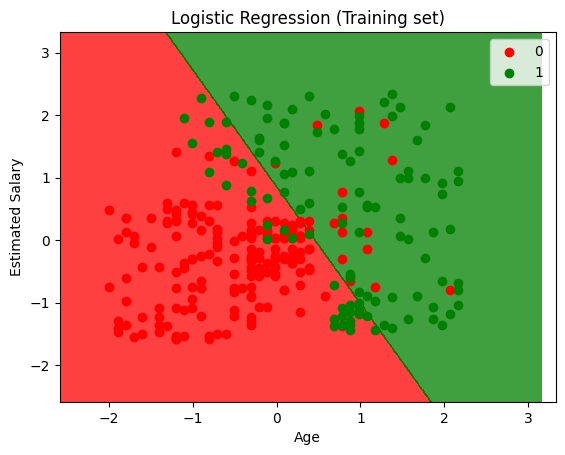

In [9]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Výsledky vizualizujeme pre testovacie dáta:

C:\Users\jakub\AppData\Local\Temp\ipykernel_20536\4140717922.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


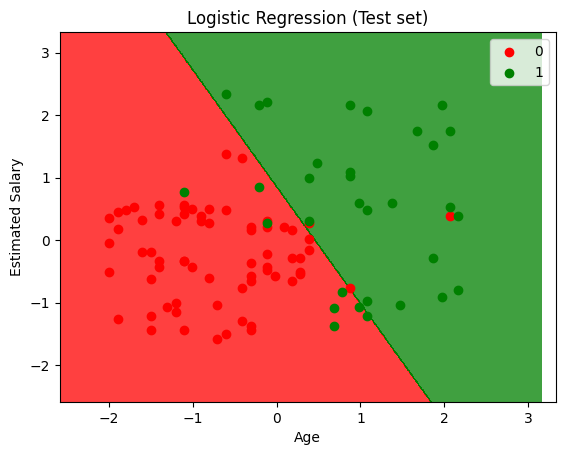

In [10]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Pokračujeme v cvičení s časťou UMELÉ NEURÓNOVÉ SIETE.

In [11]:
# Importovanie kniznic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

# 2. Dataset: Churn_Modelling.csv - Logisticka Regresia
# Nacitanie datasetu
dataset_churn = pd.read_csv("Churn_Modelling.csv")
X_churn = dataset_churn.iloc[:, 3:13].values
y_churn = dataset_churn.iloc[:, 13].values

# Encoding categorical data
le_churn = LabelEncoder()
X_churn[:, 2] = le_churn.fit_transform(X_churn[:, 2])

# One Hot Encoding "Geography" stlpec
ct_churn = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough"
)
X_churn = np.array(ct_churn.fit_transform(X_churn))

# Feature Scaling
sc_churn = StandardScaler()
X_churn = sc_churn.fit_transform(X_churn)

# Rozdelenie datasetu na trenovaciu a testovaciu mnozinu
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(
    X_churn, y_churn, test_size=0.25, random_state=0
)

sc = StandardScaler()
X_train_churn = sc.fit_transform(X_train_churn)
X_test_churn = sc.transform(X_test_churn)

# Fitting Logistic Regression to the Training set
classifier_churn = LogisticRegression(random_state=0)
classifier_churn.fit(X_train_churn, y_train_churn)


# Predikcia vysledkov pre testovaciu mnozinu
y_pred_churn_lr = classifier_churn.predict(X_test_churn)
print(
    np.concatenate(
        (
            y_pred_churn_lr.reshape(len(y_pred_churn_lr), 1),
            y_test_churn.reshape(len(y_test_churn), 1),
        ),
        1,
    )
)

# Confusion Matrix a accuracy score pre Logisticku Regresiu
cm_churn_lr = confusion_matrix(y_test_churn, y_pred_churn_lr)
accuracy_churn_lr = accuracy_score(y_test_churn, y_pred_churn_lr)
print("Confusion Matrix pre Churn_Modelling - Logisticka Regresia:")
print(cm_churn_lr)
print(f"Accuracy: {accuracy_churn_lr}\n")

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
Confusion Matrix pre Churn_Modelling - Logisticka Regresia:
[[1901   90]
 [ 393  116]]
Accuracy: 0.8068

